# **DESAFIO ALURA, EVALUACIÓN DE TIENDAS**

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Contar en cuántas tiendas aparece cada vendedor
vendedores_repetidos = tienda_unificada.groupby('Vendedor')['tienda'].nunique().reset_index()
vendedores_repetidos.rename(columns={'tienda': 'numero_tiendas'}, inplace=True)

# Filtrar vendedores que aparecen en más de una tienda
vendedores_repetidos = vendedores_repetidos[vendedores_repetidos['numero_tiendas'] > 1]

# Mostrar vendedores repetidos
print("\nVendedores que aparecen en más de una tienda:")
print(vendedores_repetidos)


Vendedores que aparecen en más de una tienda:
           Vendedor  numero_tiendas
0   Beatriz Morales               4
1    Blanca Ramirez               4
2     Camila Rivera               4
3     Felipe Santos               4
4   Izabela de León               4
5    Juan Fernandez               4
6     Juliana Costa               4
7     Lucas Olivera               4
8     Maria Alfonso               4
9   Mariana Herrera               4
10      Pedro Gomez               4
11    Rafael Acosta               4
12   Santiago Silva               4
13  Ángel Rodriguez               4


In [ ]:
# Contar el número de lugares de compra únicos
lugares_compra_unicos = tienda_unificada['Lugar de Compra'].nunique()

# Mostrar el resultado
print(f"\nNúmero total de lugares de compra únicos: {lugares_compra_unicos}")


Número total de lugares de compra únicos: 19


In [ ]:
# Obtener una lista de todos los lugares de compra únicos
lista_lugares_compra = tienda_unificada['Lugar de Compra'].unique()

# Mostrar la lista
print("\nLista de lugares de compra únicos:")
print(lista_lugares_compra)


Lista de lugares de compra únicos:
['Bogotá' 'Medellín' 'Cartagena' 'Cali' 'Santa Marta' 'Pereira'
 'Barranquilla' 'Villavicencio' 'Inírida' 'Cúcuta' 'Manizales' 'Neiva'
 'Bucaramanga' 'Valledupar' 'Pasto' 'Riohacha' 'Armenia' 'Leticia'
 'Soacha']


In [ ]:
# Calcular el total de ventas por lugar de compra
ventas_por_lugar = tienda_unificada.groupby('Lugar de Compra').agg(
    total_ventas=('Precio', 'sum'),
    numero_transacciones=('Precio', 'count')
).reset_index()

# Ordenar por total de ventas descendente
ventas_por_lugar = ventas_por_lugar.sort_values(by='total_ventas', ascending=False)

# Mostrar los resultados
print("\nVentas totales por lugar de compra:")
print(ventas_por_lugar)


Ventas totales por lugar de compra:
   Lugar de Compra  total_ventas  numero_transacciones
2           Bogotá  1.814858e+09                  3943
10        Medellín  1.096669e+09                  2314
4             Cali  5.065261e+08                  1007
13         Pereira  2.259273e+08                   517
1     Barranquilla  1.320405e+08                   310
5        Cartagena  1.023767e+08                   242
6           Cúcuta  9.936910e+07                   186
3      Bucaramanga  9.057330e+07                   181
14        Riohacha  7.387970e+07                   163
8          Leticia  6.714990e+07                   142
15     Santa Marta  5.310050e+07                   151
12           Pasto  4.901430e+07                    94
11           Neiva  2.089800e+07                    40
9        Manizales  1.936790e+07                    41
18   Villavicencio  1.333360e+07                    29
16          Soacha  1.231770e+07                    19
0          Armenia  1.224290

In [ ]:
# Calcular el total de ventas por lugar de compra
ventas_por_lugar = tienda_unificada.groupby('Lugar de Compra').agg(
    total_ventas=('Precio', 'sum'),
    lat=('lat', 'first'),  # Tomar la primera latitud disponible
    lon=('lon', 'first')   # Tomar la primera longitud disponible
).reset_index()

# Ordenar por total de ventas descendente
ventas_por_lugar = ventas_por_lugar.sort_values(by='total_ventas', ascending=False)

# Mostrar los resultados
print("\nVentas totales por lugar de compra:")
print(ventas_por_lugar)


Ventas totales por lugar de compra:
   Lugar de Compra  total_ventas       lat       lon
2           Bogotá  1.814858e+09   4.60971 -74.08175
10        Medellín  1.096669e+09   6.25184 -75.56359
4             Cali  5.065261e+08   3.43722 -76.52250
13         Pereira  2.259273e+08   4.81333 -75.69611
1     Barranquilla  1.320405e+08  10.96854 -74.78132
5        Cartagena  1.023767e+08  10.39972 -75.51444
6           Cúcuta  9.936910e+07   7.89391 -72.50782
3      Bucaramanga  9.057330e+07   7.12539 -73.11980
14        Riohacha  7.387970e+07  11.54444 -72.90722
8          Leticia  6.714990e+07  -4.21528 -69.94056
15     Santa Marta  5.310050e+07  11.24079 -74.19904
12           Pasto  4.901430e+07   1.21361 -77.28111
11           Neiva  2.089800e+07   2.92730 -75.28189
9        Manizales  1.936790e+07   5.06889 -75.51738
18   Villavicencio  1.333360e+07   4.14200 -73.62664
16          Soacha  1.231770e+07   4.57937 -74.21682
0          Armenia  1.224290e+07   4.53389 -75.68111
7        

In [ ]:
import folium

# Crear un mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Normalizar el tamaño de los círculos (ajustar entre 500 y 50000)
max_ventas = ventas_por_lugar['total_ventas'].max()
min_ventas = ventas_por_lugar['total_ventas'].min()
ventas_por_lugar['radio'] = ((ventas_por_lugar['total_ventas'] - min_ventas) / (max_ventas - min_ventas)) * 49500 + 500

# Agregar círculos para cada lugar de compra
for _, fila in ventas_por_lugar.iterrows():
    lugar = fila['Lugar de Compra']
    lat, lon = fila['lat'], fila['lon']
    radio = fila['radio']
    total_ventas = fila['total_ventas']

    folium.Circle(
        location=[lat, lon],
        radius=radio,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Lugar: {lugar}<br>Ventas totales: {total_ventas:.2f}"
    ).add_to(mapa)

# Mostrar el mapa
mapa

#1. Análisis de facturación



In [ ]:
import pandas as pd

# Lista de URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Leer todos los archivos CSV y almacenarlos en una lista de DataFrames
dataframes = [pd.read_csv(url) for url in urls]

# Combinar todos los DataFrames en uno solo
tienda_unificada = pd.concat(dataframes, ignore_index=True)

# Mostrar las primeras filas del DataFrame unificado
print("Primeras filas del conjunto de datos:")
tienda_unificada.head()


Primeras filas del conjunto de datos:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Lista de URLs de los archivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# Lista de nombres de tiendas correspondientes a cada URL
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Leer todos los archivos CSV y agregar una columna 'tienda'
dataframes = []
for url, nombre_tienda in zip(urls, nombres_tiendas):
    df = pd.read_csv(url)
    df['tienda'] = nombre_tienda  # Agregar columna 'tienda'
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
tienda_unificada = pd.concat(dataframes, ignore_index=True)

# Verificar las columnas del DataFrame unificado
print("Columnas después de agregar la columna 'tienda':")
print(tienda_unificada.columns)


Columnas después de agregar la columna 'tienda':
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [ ]:
# Agrupar por tienda y calcular métricas de facturación
analisis_facturacion = tienda_unificada.groupby('tienda').agg(
    total_ventas=('Precio', 'sum'),  # Suma de precios (ventas totales)
    promedio_ventas=('Precio', 'mean'),  # Promedio de precios
    numero_transacciones=('Precio', 'count'),  # Número de transacciones
    venta_maxima=('Precio', 'max'),  # Venta más alta
    venta_minima=('Precio', 'min')  # Venta más baja
).reset_index()

# Mostrar el análisis de facturación
print("\nAnálisis de facturación por tienda:")
print(analisis_facturacion)


Análisis de facturación por tienda:
     tienda  total_ventas  promedio_ventas  numero_transacciones  \
0  Tienda 1  1.150880e+09    487867.910131                  2359   
1  Tienda 2  1.116344e+09    473227.426876                  2359   
2  Tienda 3  1.098020e+09    465459.771089                  2359   
3  Tienda 4  1.038376e+09    440362.892282                  2358   

   venta_maxima  venta_minima  
0     2977000.0        7600.0  
1     2953400.0        7600.0  
2     2968200.0        7600.0  
3     2902200.0        7600.0  


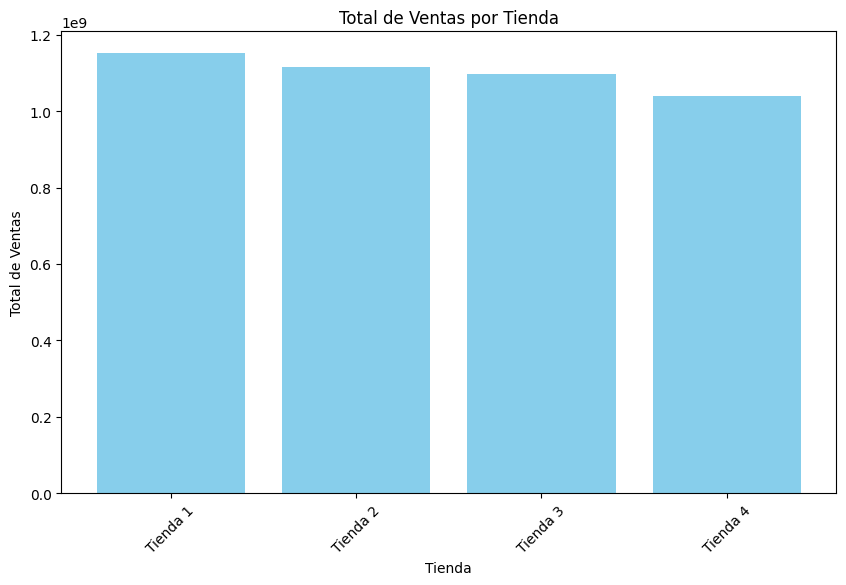

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras para el total de ventas por tienda
plt.figure(figsize=(10, 6))
plt.bar(analisis_facturacion['tienda'], analisis_facturacion['total_ventas'], color='skyblue')
plt.title('Total de Ventas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Guardar el análisis en un archivo CSV
analisis_facturacion.to_csv('analisis_facturacion.csv', index=False)
print("\nEl análisis de facturación ha sido guardado en 'analisis_facturacion.csv'.")


El análisis de facturación ha sido guardado en 'analisis_facturacion.csv'.


In [ ]:
# Opción 1: Usar print()
print(analisis_facturacion)

     tienda  total_ventas  promedio_ventas  numero_transacciones  \
0  Tienda 1  1.150880e+09    487867.910131                  2359   
1  Tienda 2  1.116344e+09    473227.426876                  2359   
2  Tienda 3  1.098020e+09    465459.771089                  2359   
3  Tienda 4  1.038376e+09    440362.892282                  2358   

   venta_maxima  venta_minima  
0     2977000.0        7600.0  
1     2953400.0        7600.0  
2     2968200.0        7600.0  
3     2902200.0        7600.0  


# 2. Ventas por categoría

In [ ]:
# Mostrar las categorías únicas en el DataFrame
print("Categorías únicas en el DataFrame:")
print(tienda_unificada['Categoría del Producto'].unique())

Categorías únicas en el DataFrame:
['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']


In [ ]:
# Contar la frecuencia de cada categoría por tienda
categorias_por_tienda = tienda_unificada.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='frecuencia')

# Mostrar el resultado
print("\nFrecuencia de categorías por tienda:")
print(categorias_por_tienda)


Frecuencia de categorías por tienda:
      tienda   Categoría del Producto  frecuencia
0   Tienda 1  Artículos para el hogar         171
1   Tienda 1     Deportes y diversión         284
2   Tienda 1        Electrodomésticos         312
3   Tienda 1             Electrónicos         448
4   Tienda 1   Instrumentos musicales         182
5   Tienda 1                 Juguetes         324
6   Tienda 1                   Libros         173
7   Tienda 1                  Muebles         465
8   Tienda 2  Artículos para el hogar         181
9   Tienda 2     Deportes y diversión         275
10  Tienda 2        Electrodomésticos         305
11  Tienda 2             Electrónicos         422
12  Tienda 2   Instrumentos musicales         224
13  Tienda 2                 Juguetes         313
14  Tienda 2                   Libros         197
15  Tienda 2                  Muebles         442
16  Tienda 3  Artículos para el hogar         177
17  Tienda 3     Deportes y diversión         277
18  Tienda 3

In [ ]:
# Encontrar la categoría más popular por tienda
categoria_mas_popular = categorias_por_tienda.loc[categorias_por_tienda.groupby('tienda')['frecuencia'].idxmax()]

# Mostrar el resultado
print("\nCategoría más popular por tienda:")
print(categoria_mas_popular)


Categoría más popular por tienda:
      tienda Categoría del Producto  frecuencia
7   Tienda 1                Muebles         465
15  Tienda 2                Muebles         442
23  Tienda 3                Muebles         499
31  Tienda 4                Muebles         480


In [ ]:
# Guardar el análisis en un archivo CSV
categoria_mas_popular.to_csv('categorias_mas_populares.csv', index=False)
print("\nEl análisis de categorías más populares ha sido guardado en 'categorias_mas_populares.csv'.")


El análisis de categorías más populares ha sido guardado en 'categorias_mas_populares.csv'.


# 3. Calificación promedio de la tienda


In [ ]:
# Mostrar las primeras filas de la columna 'Calificación'
print("Primeras filas de la columna 'Calificación':")
print(tienda_unificada['Calificación'].head())

# Resumen estadístico de la columna 'Calificación'
print("\nResumen estadístico de la columna 'Calificación':")
print(tienda_unificada['Calificación'].describe())

Primeras filas de la columna 'Calificación':
0    4
1    1
2    1
3    4
4    5
Name: Calificación, dtype: int64

Resumen estadístico de la columna 'Calificación':
count    9435.000000
mean        4.014520
std         1.390518
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Calificación, dtype: float64


In [ ]:
# Calcular el promedio de calificaciones por tienda
promedio_calificaciones = tienda_unificada.groupby('tienda')['Calificación'].mean().reset_index()

# Renombrar la columna para mayor claridad
promedio_calificaciones.rename(columns={'Calificación': 'Promedio_Calificacion'}, inplace=True)

# Mostrar el resultado
print("\nPromedio de calificaciones por tienda:")
print(promedio_calificaciones)


Promedio de calificaciones por tienda:
     tienda  Promedio_Calificacion
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


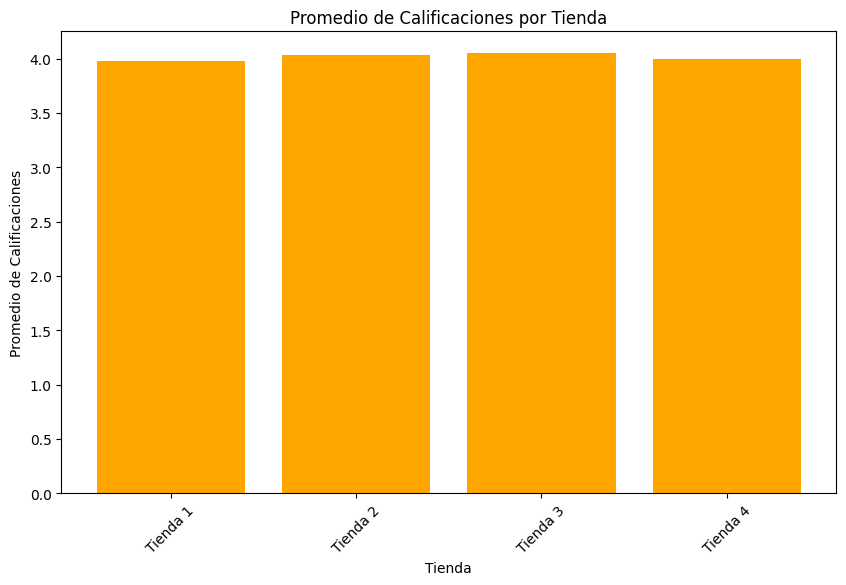

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras para el promedio de calificaciones
plt.figure(figsize=(10, 6))
plt.bar(promedio_calificaciones['tienda'], promedio_calificaciones['Promedio_Calificacion'], color='orange')
plt.title('Promedio de Calificaciones por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Guardar el análisis en un archivo CSV
promedio_calificaciones.to_csv('promedio_calificaciones.csv', index=False)
print("\nEl análisis de promedio de calificaciones ha sido guardado en 'promedio_calificaciones.csv'.")


El análisis de promedio de calificaciones ha sido guardado en 'promedio_calificaciones.csv'.


In [ ]:
# Opción 1: Usar print()
print(promedio_calificaciones)

     tienda  Promedio_Calificacion
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


# 4. Productos más y menos vendidos

In [ ]:
# Contar las ventas de cada producto por tienda
ventas_por_producto = tienda_unificada.groupby(['tienda', 'Producto']).size().reset_index(name='ventas')

# Mostrar el resultado
print("\nVentas de cada producto por tienda:")
print(ventas_por_producto)


Ventas de cada producto por tienda:
       tienda                   Producto  ventas
0    Tienda 1          Ajedrez de madera      49
1    Tienda 1                    Armario      60
2    Tienda 1          Asistente virtual      40
3    Tienda 1                Auriculares      50
4    Tienda 1  Auriculares con micrófono      33
..        ...                        ...     ...
199  Tienda 4                 Smartwatch      39
200  Tienda 4            Sofá reclinable      47
201  Tienda 4              TV LED UHD 4K      40
202  Tienda 4                Tablet ABXY      45
203  Tienda 4               Vaso térmico      48

[204 rows x 3 columns]


In [ ]:
# Encontrar el producto más vendido por tienda
productos_mas_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['ventas'].idxmax()]

# Encontrar el producto menos vendido por tienda
productos_menos_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['ventas'].idxmin()]

# Mostrar los resultados
print("\nProductos más vendidos por tienda:")
print(productos_mas_vendidos)

print("\nProductos menos vendidos por tienda:")
print(productos_menos_vendidos)


Productos más vendidos por tienda:
       tienda                   Producto  ventas
1    Tienda 1                    Armario      60
75   Tienda 2  Iniciando en programación      65
129  Tienda 3              Kit de bancas      57
163  Tienda 4                   Cama box      62

Productos menos vendidos por tienda:
       tienda                   Producto  ventas
4    Tienda 1  Auriculares con micrófono      33
77   Tienda 2              Juego de mesa      32
111  Tienda 3    Bloques de construcción      35
175  Tienda 4         Guitarra eléctrica      33


In [ ]:
# Contar las ventas de cada producto en el total
ventas_totales = tienda_unificada.groupby('Producto').size().reset_index(name='ventas')

# Encontrar el producto más vendido en el total
producto_mas_vendido_total = ventas_totales.loc[ventas_totales['ventas'].idxmax()]

# Encontrar el producto menos vendido en el total
producto_menos_vendido_total = ventas_totales.loc[ventas_totales['ventas'].idxmin()]

# Mostrar los resultados
print("\nProducto más vendido en el total:")
print(producto_mas_vendido_total)

print("\nProducto menos vendido en el total:")
print(producto_menos_vendido_total)


Producto más vendido en el total:
Producto    Mesa de noche
ventas                210
Name: 32, dtype: object

Producto menos vendido en el total:
Producto    Celular ABXY
ventas               157
Name: 13, dtype: object


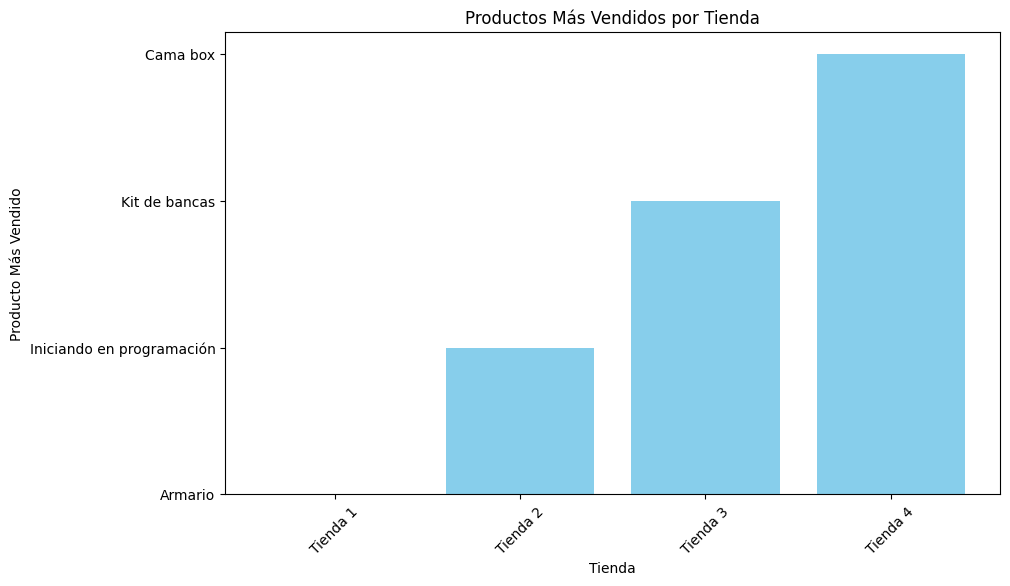

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras para productos más vendidos por tienda
plt.figure(figsize=(10, 6))
plt.bar(productos_mas_vendidos['tienda'], productos_mas_vendidos['Producto'], color='skyblue')
plt.title('Productos Más Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Producto Más Vendido')
plt.xticks(rotation=45)
plt.show()

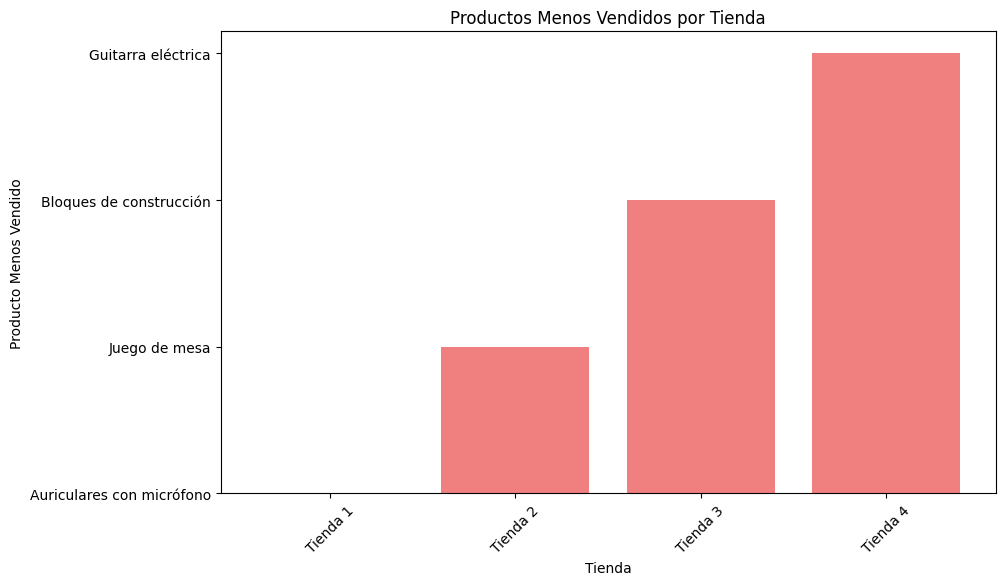

In [ ]:
# Gráfico de barras para productos menos vendidos por tienda
plt.figure(figsize=(10, 6))
plt.bar(productos_menos_vendidos['tienda'], productos_menos_vendidos['Producto'], color='lightcoral')
plt.title('Productos Menos Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Producto Menos Vendido')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Guardar el análisis de productos más vendidos por tienda
productos_mas_vendidos.to_csv('productos_mas_vendidos.csv', index=False)

# Guardar el análisis de productos menos vendidos por tienda
productos_menos_vendidos.to_csv('productos_menos_vendidos.csv', index=False)

# Guardar el análisis de productos más y menos vendidos en el total
ventas_totales.to_csv('ventas_totales.csv', index=False)

print("\nLos análisis han sido guardados en archivos CSV.")


Los análisis han sido guardados en archivos CSV.


In [ ]:
print (productos_mas_vendidos)

       tienda                   Producto  ventas
1    Tienda 1                    Armario      60
75   Tienda 2  Iniciando en programación      65
129  Tienda 3              Kit de bancas      57
163  Tienda 4                   Cama box      62


In [ ]:
print (productos_menos_vendidos)

       tienda                   Producto  ventas
4    Tienda 1  Auriculares con micrófono      33
77   Tienda 2              Juego de mesa      32
111  Tienda 3    Bloques de construcción      35
175  Tienda 4         Guitarra eléctrica      33


In [ ]:
print (ventas_totales)

                       Producto  ventas
0             Ajedrez de madera     180
1                       Armario     197
2             Asistente virtual     167
3                   Auriculares     174
4     Auriculares con micrófono     158
5           Balón de baloncesto     197
6             Balón de voleibol     184
7                       Batería     203
8                     Bicicleta     196
9       Bloques de construcción     199
10                     Cama box     199
11                    Cama king     201
12    Carrito de control remoto     206
13                 Celular ABXY     157
14  Ciencia de datos con Python     166
15                   Cubertería     189
16              Cubo mágico 8x8     180
17           Cuerda para saltar     186
18      Dashboards con Power BI     181
19               Dinosaurio Rex     175
20                       Estufa     187
21            Guitarra acústica     188
22           Guitarra eléctrica     165
23                    Impresora     188


# 5. Envío promedio por tienda

In [ ]:
# Mostrar las primeras filas de las columnas relevantes
print("Primeras filas de las columnas 'Costo de envío' y 'Precio':")
print(tienda_unificada[['Costo de envío', 'Precio']].head())

# Resumen estadístico de las columnas
print("\nResumen estadístico de 'Costo de envío' y 'Precio':")
print(tienda_unificada[['Costo de envío', 'Precio']].describe())

Primeras filas de las columnas 'Costo de envío' y 'Precio':
   Costo de envío    Precio
0          6900.0  164300.0
1          8400.0  192300.0
2         15900.0  209600.0
3         41000.0  757500.0
4         20200.0  335200.0

Resumen estadístico de 'Costo de envío' y 'Precio':
       Costo de envío        Precio
count     9435.000000  9.435000e+03
mean     24875.145734  4.667323e+05
std      31480.036346  5.903207e+05
min          0.000000  7.600000e+03
25%       3000.000000  5.520000e+04
50%      11700.000000  2.215000e+05
75%      34900.000000  6.633000e+05
max     162500.000000  2.977000e+06


In [ ]:
# Calcular el costo promedio de envío por tienda
costo_envio_promedio_por_tienda = tienda_unificada.groupby('tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio_por_tienda.rename(columns={'Costo de envío': 'Costo_Envio_Promedio'}, inplace=True)

# Mostrar el resultado
print("\nCosto promedio de envío por tienda:")
print(costo_envio_promedio_por_tienda)


Costo promedio de envío por tienda:
     tienda  Costo_Envio_Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


In [ ]:
# Calcular el costo promedio de envío en total
costo_envio_promedio_total = tienda_unificada['Costo de envío'].mean()

# Mostrar el resultado
print("\nCosto promedio de envío en total:")
print(costo_envio_promedio_total)


Costo promedio de envío en total:
24875.145733969264


In [ ]:
# Encontrar el producto con el costo de envío más caro por tienda
producto_envio_mas_caro_por_tienda = tienda_unificada.loc[
    tienda_unificada.groupby('tienda')['Costo de envío'].idxmax()
][['tienda', 'Producto', 'Costo de envío']]

# Mostrar el resultado
print("\nProducto con el costo de envío más caro por tienda:")
print(producto_envio_mas_caro_por_tienda)


Producto con el costo de envío más caro por tienda:
        tienda       Producto  Costo de envío
1020  Tienda 1  TV LED UHD 4K        160800.0
2477  Tienda 2  TV LED UHD 4K        162500.0
7013  Tienda 3  TV LED UHD 4K        158400.0
7724  Tienda 4  TV LED UHD 4K        154700.0


In [ ]:
# Encontrar el producto con el costo de envío más caro en total
producto_envio_mas_caro_total = tienda_unificada.loc[
    tienda_unificada['Costo de envío'].idxmax()
][['Producto', 'Costo de envío']]

# Mostrar el resultado
print("\nProducto con el costo de envío más caro en total:")
print(producto_envio_mas_caro_total)


Producto con el costo de envío más caro en total:
Producto          TV LED UHD 4K
Costo de envío         162500.0
Name: 2477, dtype: object


In [ ]:
# Crear una columna con el cociente entre precio y costo de envío
tienda_unificada['Relacion_Costo'] = tienda_unificada['Precio'] / tienda_unificada['Costo de envío']

# Mostrar las primeras filas con la nueva columna
print("\nPrimeras filas con la relación costo_producto / costo_envio:")
print(tienda_unificada[['Producto', 'Precio', 'Costo de envío', 'Relacion_Costo']].head())


Primeras filas con la relación costo_producto / costo_envio:
            Producto    Precio  Costo de envío  Relacion_Costo
0  Asistente virtual  164300.0          6900.0       23.811594
1    Mesa de comedor  192300.0          8400.0       22.892857
2      Juego de mesa  209600.0         15900.0       13.182390
3         Microondas  757500.0         41000.0       18.475610
4   Silla de oficina  335200.0         20200.0       16.594059


In [ ]:
# Definir un umbral para la relación (por ejemplo, 2.0)
umbral_relacion = 2.0

# Filtrar los productos con una relación baja
productos_a_eliminar = tienda_unificada[tienda_unificada['Relacion_Costo'] < umbral_relacion][
    ['Producto', 'Precio', 'Costo de envío', 'Relacion_Costo']
]

# Mostrar los productos candidatos a eliminarse
print("\nProductos candidatos a eliminarse debido a altos costos de envío:")
print(productos_a_eliminar)


Productos candidatos a eliminarse debido a altos costos de envío:
                Producto   Precio  Costo de envío  Relacion_Costo
687      Cubo mágico 8x8  15400.0          8300.0        1.855422
2268      Dinosaurio Rex  15300.0          9500.0        1.610526
2293  Cuerda para saltar   9700.0          7700.0        1.259740
2602     Cubo mágico 8x8   9500.0          7300.0        1.301370
2750  Cuerda para saltar   8600.0          5100.0        1.686275
3406     Cubo mágico 8x8  10500.0          7400.0        1.418919
3437  Cuerda para saltar   7600.0          5200.0        1.461538
4264  Cuerda para saltar   8900.0          5300.0        1.679245
4334     Cubo mágico 8x8   8900.0          5300.0        1.679245
5882      Dinosaurio Rex  18600.0          9700.0        1.917526
8288     Cubo mágico 8x8  14400.0          7600.0        1.894737


In [ ]:
# Crear una columna con la relación costo/envío
tienda_unificada['Relacion_Costo_Envio'] = tienda_unificada['Precio'] / tienda_unificada['Costo de envío']

# Mostrar las primeras filas con la nueva columna
print("\nPrimeras filas con la relación costo/envío:")
print(tienda_unificada[['Producto', 'Precio', 'Costo de envío', 'Relacion_Costo_Envio']].head())


Primeras filas con la relación costo/envío:
            Producto    Precio  Costo de envío  Relacion_Costo_Envio
0  Asistente virtual  164300.0          6900.0             23.811594
1    Mesa de comedor  192300.0          8400.0             22.892857
2      Juego de mesa  209600.0         15900.0             13.182390
3         Microondas  757500.0         41000.0             18.475610
4   Silla de oficina  335200.0         20200.0             16.594059


In [ ]:
# Función para obtener los 10 mejores y peores productos por tienda
def mejores_peores_por_tienda(df, columna_relacion):
    mejores = df.loc[df.groupby('tienda')[columna_relacion].nlargest(10).index.get_level_values(1)]
    peores = df.loc[df.groupby('tienda')[columna_relacion].nsmallest(10).index.get_level_values(1)]
    return mejores, peores

# Obtener los 10 mejores y peores productos por tienda
mejores_por_tienda, peores_por_tienda = mejores_peores_por_tienda(tienda_unificada, 'Relacion_Costo_Envio')

# Mostrar los resultados
print("\n10 productos con mejor relación costo/envío por tienda:")
print(mejores_por_tienda[['tienda', 'Producto', 'Relacion_Costo_Envio']])

print("\n10 productos con peor relación costo/envío por tienda:")
print(peores_por_tienda[['tienda', 'Producto', 'Relacion_Costo_Envio']])


10 productos con mejor relación costo/envío por tienda:
        tienda                     Producto  Relacion_Costo_Envio
5     Tienda 1      Bloques de construcción                   inf
6     Tienda 1                  Muñeca bebé                   inf
24    Tienda 1      Dashboards con Power BI                   inf
54    Tienda 1              Cubo mágico 8x8                   inf
60    Tienda 1           Cuerda para saltar                   inf
90    Tienda 1                  Muñeca bebé                   inf
103   Tienda 1      Dashboards con Power BI                   inf
116   Tienda 1      Dashboards con Power BI                   inf
117   Tienda 1      Bloques de construcción                   inf
135   Tienda 1      Dashboards con Power BI                   inf
2377  Tienda 2      Dashboards con Power BI                   inf
2379  Tienda 2                 Set de vasos                   inf
2381  Tienda 2  Ciencia de datos con Python                   inf
2385  Tienda 2     

In [ ]:
# Obtener los 10 mejores productos en total
mejores_totales = tienda_unificada.nlargest(10, 'Relacion_Costo_Envio')[['Producto', 'Relacion_Costo_Envio']]

# Obtener los 10 peores productos en total
peores_totales = tienda_unificada.nsmallest(10, 'Relacion_Costo_Envio')[['Producto', 'Relacion_Costo_Envio']]

# Mostrar los resultados
print("\n10 productos con mejor relación costo/envío en total:")
print(mejores_totales)

print("\n10 productos con peor relación costo/envío en total:")
print(peores_totales)


10 productos con mejor relación costo/envío en total:
                    Producto  Relacion_Costo_Envio
5    Bloques de construcción                   inf
6                Muñeca bebé                   inf
24   Dashboards con Power BI                   inf
54           Cubo mágico 8x8                   inf
60        Cuerda para saltar                   inf
90               Muñeca bebé                   inf
103  Dashboards con Power BI                   inf
116  Dashboards con Power BI                   inf
117  Bloques de construcción                   inf
135  Dashboards con Power BI                   inf

10 productos con peor relación costo/envío en total:
                Producto  Relacion_Costo_Envio
2293  Cuerda para saltar              1.259740
2602     Cubo mágico 8x8              1.301370
3406     Cubo mágico 8x8              1.418919
3437  Cuerda para saltar              1.461538
2268      Dinosaurio Rex              1.610526
4264  Cuerda para saltar              1.679245
4

In [ ]:
# Mostrar las columnas del DataFrame
print("Columnas disponibles en el DataFrame:")
print(tienda_unificada.columns)

Columnas disponibles en el DataFrame:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda',
       'Relacion_Costo', 'Relacion_Costo_Envio'],
      dtype='object')


In [ ]:
# Agrupar por tienda y calcular promedios
promedios_por_tienda = tienda_unificada.groupby('tienda').agg(
    Costo_Envio_Promedio=('Costo de envío', 'mean'),
    Calificacion_Promedio=('Calificación', 'mean')
).reset_index()

# Mostrar los resultados
print("\nPromedios de costo de envío y calificación por tienda:")
print(promedios_por_tienda)

# Calcular la correlación entre costo de envío y calificación
correlacion = promedios_por_tienda['Costo_Envio_Promedio'].corr(promedios_por_tienda['Calificacion_Promedio'])

# Mostrar la correlación
print(f"\nCorrelación entre costo de envío y calificación: {correlacion:.2f}")


Promedios de costo de envío y calificación por tienda:
     tienda  Costo_Envio_Promedio  Calificacion_Promedio
0  Tienda 1          26018.609580               3.976685
1  Tienda 2          25216.235693               4.037304
2  Tienda 3          24805.680373               4.048326
3  Tienda 4          23459.457167               3.995759

Correlación entre costo de envío y calificación: -0.10


In [ ]:
# Mostrar las primeras filas de las columnas 'lat' y 'lon'
print("Primeras filas de las columnas 'lat' y 'lon':")
print(tienda_unificada[['lat', 'lon']].head())

# Resumen estadístico de las columnas
print("\nResumen estadístico de 'lat' y 'lon':")
print(tienda_unificada[['lat', 'lon']].describe())

Primeras filas de las columnas 'lat' y 'lon':
        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
4   6.25184 -75.56359

Resumen estadístico de 'lat' y 'lon':
               lat          lon
count  9435.000000  9435.000000
mean      5.428909   -74.760108
std       2.355663     1.207155
min      -4.215280   -77.281110
25%       4.609710   -75.563590
50%       4.609710   -74.199040
75%       6.251840   -74.081750
max      11.544440   -67.923900


In [ ]:
# Agrupar por latitud y longitud y calcular el promedio de calificación
calificacion_por_ubicacion = tienda_unificada.groupby(['lat', 'lon'])['Calificación'].mean().reset_index()

# Renombrar la columna para mayor claridad
calificacion_por_ubicacion.rename(columns={'Calificación': 'Calificacion_Promedio'}, inplace=True)

# Mostrar los resultados
print("\nPromedio de calificación por ubicación geográfica:")
print(calificacion_por_ubicacion)


Promedio de calificación por ubicación geográfica:
         lat       lon  Calificacion_Promedio
0   -4.21528 -69.94056               3.922535
1    1.21361 -77.28111               4.148936
2    2.92730 -75.28189               3.800000
3    3.43722 -76.52250               4.046673
4    3.86530 -67.92390               3.642857
5    4.14200 -73.62664               3.827586
6    4.53389 -75.68111               3.464286
7    4.57937 -74.21682               3.894737
8    4.60971 -74.08175               4.113619
9    4.81333 -75.69611               4.013540
10   5.06889 -75.51738               3.634146
11   6.25184 -75.56359               3.926534
12   7.12539 -73.11980               3.977901
13   7.89391 -72.50782               3.940860
14  10.39972 -75.51444               4.020661
15  10.46314 -73.25322               4.071429
16  10.96854 -74.78132               3.803226
17  11.24079 -74.19904               3.596026
18  11.54444 -72.90722               3.895706


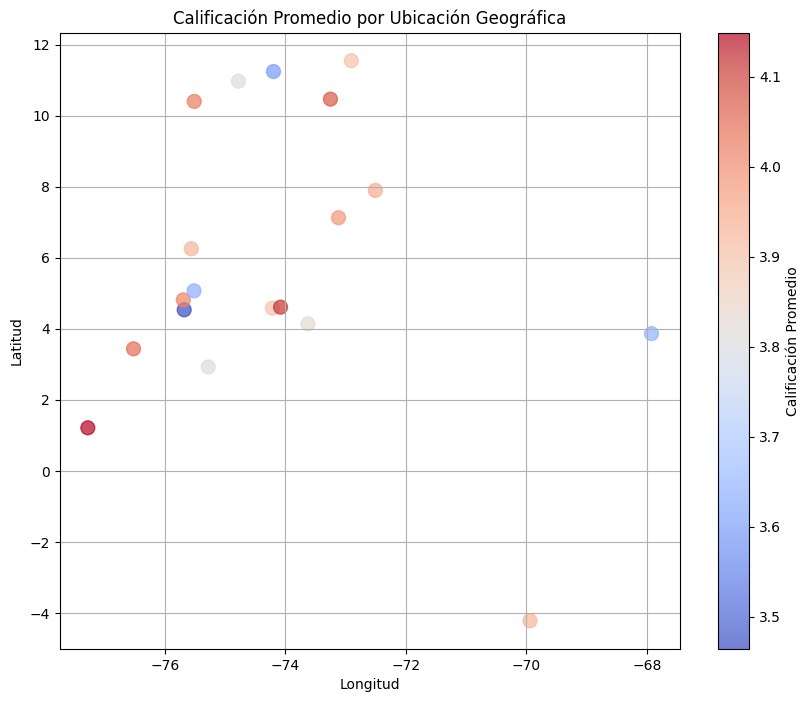

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión geográfico
plt.figure(figsize=(10, 8))
plt.scatter(calificacion_por_ubicacion['lon'], calificacion_por_ubicacion['lat'],
            c=calificacion_por_ubicacion['Calificacion_Promedio'], cmap='coolwarm', s=100, alpha=0.7)
plt.colorbar(label='Calificación Promedio')
plt.title('Calificación Promedio por Ubicación Geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid()
plt.show()

In [ ]:
# Calcular correlaciones
correlacion_lat_calificacion = calificacion_por_ubicacion['lat'].corr(calificacion_por_ubicacion['Calificacion_Promedio'])
correlacion_lon_calificacion = calificacion_por_ubicacion['lon'].corr(calificacion_por_ubicacion['Calificacion_Promedio'])

# Mostrar las correlaciones
print(f"\nCorrelación entre latitud y calificación: {correlacion_lat_calificacion:.2f}")
print(f"Correlación entre longitud y calificación: {correlacion_lon_calificacion:.2f}")


Correlación entre latitud y calificación: -0.08
Correlación entre longitud y calificación: -0.20


In [ ]:
import folium

# Crear un mapa centrado en una ubicación específica
mapa = folium.Map(location=[calificacion_por_ubicacion['lat'].mean(), calificacion_por_ubicacion['lon'].mean()], zoom_start=10)

# Agregar marcadores al mapa
for _, row in calificacion_por_ubicacion.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=8,
        color='blue' if row['Calificacion_Promedio'] > 4 else 'red',
        fill=True,
        fill_color='blue' if row['Calificacion_Promedio'] > 4 else 'red',
        popup=f"Calificación: {row['Calificacion_Promedio']:.2f}"
    ).add_to(mapa)

# Mostrar el mapa
mapa

In [ ]:
# Guardar el análisis de calificación por ubicación
calificacion_por_ubicacion.to_csv('calificacion_por_ubicacion.csv', index=False)

print("\nEl análisis de calificación por ubicación ha sido guardado en 'calificacion_por_ubicacion.csv'.")


El análisis de calificación por ubicación ha sido guardado en 'calificacion_por_ubicacion.csv'.


In [ ]:
# Calcular el total de ventas por tienda
ventas_totales_por_tienda = tienda_unificada.groupby('tienda')['Precio'].sum().reset_index()
ventas_totales_por_tienda.rename(columns={'Precio': 'Ventas_Totales'}, inplace=True)

In [ ]:
# Contar las ventas por categoría y tienda
ventas_por_categoria = tienda_unificada.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='Ventas_Categoria')

In [ ]:
# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = tienda_unificada.groupby('tienda')['Calificación'].mean().reset_index()
calificacion_promedio_por_tienda.rename(columns={'Calificación': 'Calificacion_Promedio'}, inplace=True)

In [ ]:
# Contar las ventas por producto y tienda
ventas_por_producto = tienda_unificada.groupby(['tienda', 'Producto']).size().reset_index(name='Ventas_Producto')

# Encontrar el producto más vendido por tienda
productos_mas_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['Ventas_Producto'].idxmax()]

# Encontrar el producto menos vendido por tienda
productos_menos_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby('tienda')['Ventas_Producto'].idxmin()]

In [ ]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio_por_tienda = tienda_unificada.groupby('tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio_por_tienda.rename(columns={'Costo de envío': 'Costo_Envio_Promedio'}, inplace=True)

In [ ]:
# Combinar los DataFrames
analisis_rentabilidad = (
    ventas_totales_por_tienda
    .merge(calificacion_promedio_por_tienda, on='tienda', how='left')
    .merge(costo_envio_promedio_por_tienda, on='tienda', how='left')
)

# Mostrar el DataFrame combinado
print("\nAnálisis de rentabilidad por tienda:")
print(analisis_rentabilidad)


Análisis de rentabilidad por tienda:
     tienda  Ventas_Totales  Calificacion_Promedio  Costo_Envio_Promedio
0  Tienda 1    1.150880e+09               3.976685          26018.609580
1  Tienda 2    1.116344e+09               4.037304          25216.235693
2  Tienda 3    1.098020e+09               4.048326          24805.680373
3  Tienda 4    1.038376e+09               3.995759          23459.457167


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar los valores
scaler = MinMaxScaler()

analisis_rentabilidad['Puntaje_Ventas'] = scaler.fit_transform(analisis_rentabilidad[['Ventas_Totales']])
analisis_rentabilidad['Puntaje_Calificacion'] = scaler.fit_transform(analisis_rentabilidad[['Calificacion_Promedio']])
analisis_rentabilidad['Puntaje_Costo_Envio'] = 1 - scaler.fit_transform(analisis_rentabilidad[['Costo_Envio_Promedio']])

# Calcular el puntaje de rentabilidad total (suma ponderada)
analisis_rentabilidad['Puntaje_Rentabilidad'] = (
    analisis_rentabilidad['Puntaje_Ventas'] * 0.4 +  # Mayor peso a las ventas
    analisis_rentabilidad['Puntaje_Calificacion'] * 0.3 +  # Peso moderado a la calificación
    analisis_rentabilidad['Puntaje_Costo_Envio'] * 0.3  # Peso moderado al costo de envío
)

# Identificar la tienda menos rentable
tienda_menos_rentable = analisis_rentabilidad.loc[analisis_rentabilidad['Puntaje_Rentabilidad'].idxmin()]

# Mostrar el resultado
print("\nTienda menos rentable:")
print(tienda_menos_rentable)


Tienda menos rentable:
tienda                       Tienda 4
Ventas_Totales           1038375700.0
Calificacion_Promedio        3.995759
Costo_Envio_Promedio     23459.457167
Puntaje_Ventas                    0.0
Puntaje_Calificacion         0.266247
Puntaje_Costo_Envio               1.0
Puntaje_Rentabilidad         0.379874
Name: 3, dtype: object


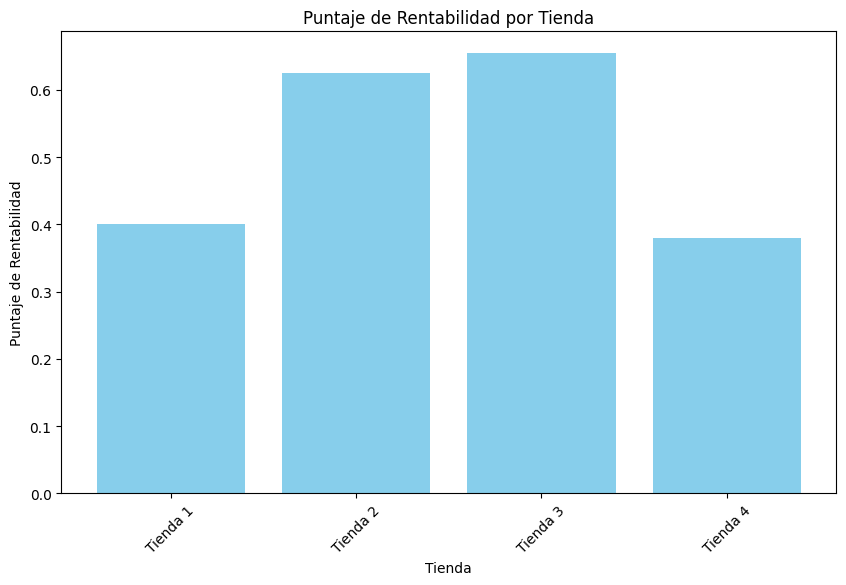

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras para el puntaje de rentabilidad
plt.figure(figsize=(10, 6))
plt.bar(analisis_rentabilidad['tienda'], analisis_rentabilidad['Puntaje_Rentabilidad'], color='skyblue')
plt.title('Puntaje de Rentabilidad por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Puntaje de Rentabilidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Guardar el análisis de rentabilidad
analisis_rentabilidad.to_csv('analisis_rentabilidad.csv', index=False)

print("\nEl análisis de rentabilidad ha sido guardado en 'analisis_rentabilidad.csv'.")


El análisis de rentabilidad ha sido guardado en 'analisis_rentabilidad.csv'.


In [ ]:
# Crear la tabla resumen
tabla_resumen = analisis_rentabilidad[['tienda', 'Ventas_Totales', 'Calificacion_Promedio',
                                        'Costo_Envio_Promedio', 'Puntaje_Rentabilidad']].copy()

# Mostrar la tabla resumen
print("\nTabla resumen de rentabilidad:")
print(tabla_resumen)


Tabla resumen de rentabilidad:
     tienda  Ventas_Totales  Calificacion_Promedio  Costo_Envio_Promedio  \
0  Tienda 1    1.150880e+09               3.976685          26018.609580   
1  Tienda 2    1.116344e+09               4.037304          25216.235693   
2  Tienda 3    1.098020e+09               4.048326          24805.680373   
3  Tienda 4    1.038376e+09               3.995759          23459.457167   

   Puntaje_Rentabilidad  
0              0.400000  
1              0.625113  
2              0.654246  
3              0.379874  


In [ ]:
# Función para aplicar estilos condicionales
def resaltar_mejor_peor(s):
    # Identificar el mejor y peor valor en la columna
    es_mejor = s == s.max()  # Mejor valor (máximo o mínimo dependiendo del caso)
    es_peor = s == s.min()   # Peor valor (mínimo o máximo dependiendo del caso)

    # Crear un estilo para cada celda
    return ['background-color: lightgreen' if v else
            'background-color: lightcoral' if p else ''
            for v, p in zip(es_mejor, es_peor)]

# Aplicar estilos condicionales a la tabla resumen
tabla_resumen_estilizada = tabla_resumen.style.apply(resaltar_mejor_peor, subset=['Ventas_Totales', 'Calificacion_Promedio', 'Puntaje_Rentabilidad']) \
                                            .apply(lambda s: resaltar_mejor_peor(-s), subset=['Costo_Envio_Promedio'])

# Mostrar la tabla resumen estilizada
tabla_resumen_estilizada

,tienda,Ventas_Totales,Calificacion_Promedio,Costo_Envio_Promedio,Puntaje_Rentabilidad
0,Tienda 1,1150880400.000000,3.976685,26018.609580,0.400000
1,Tienda 2,1116343500.000000,4.037304,25216.235693,0.625113
2,Tienda 3,1098019600.000000,4.048326,24805.680373,0.654246
3,Tienda 4,1038375700.000000,3.995759,23459.457167,0.379874


In [ ]:
# Guardar la tabla resumen sin estilos
tabla_resumen.to_csv('tabla_resumen_rentabilidad.csv', index=False)

print("\nLa tabla resumen ha sido guardada en 'tabla_resumen_rentabilidad.csv'.")


La tabla resumen ha sido guardada en 'tabla_resumen_rentabilidad.csv'.


In [ ]:
# Recalcular el puntaje de rentabilidad con los nuevos pesos
analisis_rentabilidad['Puntaje_Rentabilidad'] = (
    analisis_rentabilidad['Puntaje_Ventas'] * 0.4 +       # Peso a ventas
    analisis_rentabilidad['Puntaje_Calificacion'] * 0.4 + # Peso a calificación
    analisis_rentabilidad['Puntaje_Costo_Envio'] * 0.2    # Peso a costo de envío
)

# Mostrar el DataFrame actualizado
print("\nAnálisis de rentabilidad con nuevos pesos:")
print(analisis_rentabilidad[['tienda', 'Ventas_Totales', 'Calificacion_Promedio',
                              'Costo_Envio_Promedio', 'Puntaje_Rentabilidad']])


Análisis de rentabilidad con nuevos pesos:
     tienda  Ventas_Totales  Calificacion_Promedio  Costo_Envio_Promedio  \
0  Tienda 1    1.150880e+09               3.976685          26018.609580   
1  Tienda 2    1.116344e+09               4.037304          25216.235693   
2  Tienda 3    1.098020e+09               4.048326          24805.680373   
3  Tienda 4    1.038376e+09               3.995759          23459.457167   

   Puntaje_Rentabilidad  
0              0.400000  
1              0.678375  
2              0.706850  
3              0.306499  


In [ ]:
# Identificar la tienda menos rentable con los nuevos pesos
tienda_menos_rentable = analisis_rentabilidad.loc[analisis_rentabilidad['Puntaje_Rentabilidad'].idxmin()]

# Mostrar el resultado
print("\nTienda menos rentable con nuevos pesos:")
print(tienda_menos_rentable)


Tienda menos rentable con nuevos pesos:
tienda                       Tienda 4
Ventas_Totales           1038375700.0
Calificacion_Promedio        3.995759
Costo_Envio_Promedio     23459.457167
Puntaje_Ventas                    0.0
Puntaje_Calificacion         0.266247
Puntaje_Costo_Envio               1.0
Puntaje_Rentabilidad         0.306499
Name: 3, dtype: object


In [ ]:
# Obtener los 3 mejores vendedores en total
mejores_totales = vendedores_por_tienda.nlargest(3, 'Puntaje_Final')[['Vendedor', 'Puntaje_Final']]

# Obtener los 3 peores vendedores en total
peores_totales = vendedores_por_tienda.nsmallest(3, 'Puntaje_Final')[['Vendedor', 'Puntaje_Final']]

# Mostrar los resultados
print("\n3 mejores vendedores en total:")
print(mejores_totales)

print("\n3 peores vendedores en total:")
print(peores_totales)


3 mejores vendedores en total:
           Vendedor  Puntaje_Final
45    Felipe Santos       0.848405
18  Izabela de León       0.802928
36    Maria Alfonso       0.756248

3 peores vendedores en total:
           Vendedor  Puntaje_Final
53    Rafael Acosta       0.196647
42  Beatriz Morales       0.209456
52      Pedro Gomez       0.213285


In [ ]:
# Guardar los 3 mejores y peores vendedores por tienda
mejores_por_tienda.to_csv('mejores_vendedores_por_tienda.csv', index=False)
peores_por_tienda.to_csv('peores_vendedores_por_tienda.csv', index=False)

# Guardar los 3 mejores y peores vendedores en total
mejores_totales.to_csv('mejores_vendedores_totales.csv', index=False)
peores_totales.to_csv('peores_vendedores_totales.csv', index=False)

print("\nLos análisis han sido guardados en archivos CSV.")


Los análisis han sido guardados en archivos CSV.


In [ ]:
# Calcular métricas para cada vendedor
analisis_vendedores = tienda_unificada.groupby('Vendedor').agg(
    total_ventas=('Precio', 'sum'),  # Total de ventas
    numero_transacciones=('Precio', 'count'),  # Número de transacciones
    promedio_precio=('Precio', 'mean')  # Promedio de precio de producto vendido
).reset_index()

# Calcular el cuociente (eficiencia): total_ventas / numero_transacciones
analisis_vendedores['cuociente_eficiencia'] = analisis_vendedores['total_ventas'] / analisis_vendedores['numero_transacciones']

# Ordenar por eficiencia descendente (mayor cuociente primero)
analisis_vendedores = analisis_vendedores.sort_values(by='cuociente_eficiencia', ascending=False)

# Mostrar el análisis completo
print("\nAnálisis de eficiencia de vendedores:")
print(analisis_vendedores)


Análisis de eficiencia de vendedores:
           Vendedor  total_ventas  numero_transacciones  promedio_precio  \
8     Maria Alfonso   349694800.0                   679    515014.432990   
3     Felipe Santos   353796000.0                   701    504701.854494   
6     Juliana Costa   338364700.0                   677    499800.147710   
11    Rafael Acosta   310292300.0                   625    496467.680000   
10      Pedro Gomez   313350900.0                   655    478398.320611   
4   Izabela de León   350342400.0                   744    470890.322581   
0   Beatriz Morales   302695600.0                   650    465685.538462   
2     Camila Rivera   303184200.0                   667    454549.025487   
7     Lucas Olivera   305403600.0                   674    453121.068249   
12   Santiago Silva   293418200.0                   650    451412.615385   
5    Juan Fernandez   308562100.0                   694    444613.976945   
1    Blanca Ramirez   299586600.0                

In [ ]:
# Calcular métricas para cada vendedor
analisis_vendedores = tienda_unificada.groupby(['Vendedor', 'tienda']).agg(
    total_ventas=('Precio', 'sum'),  # Total de ventas
    numero_transacciones=('Precio', 'count'),  # Número de transacciones
    promedio_precio=('Precio', 'mean'),  # Promedio de precio de producto vendido
    producto_mas_caro=('Precio', 'max')  # Producto más caro vendido
).reset_index()

# Calcular el cuociente (eficiencia): total_ventas / numero_transacciones
analisis_vendedores['cuociente_eficiencia'] = analisis_vendedores['total_ventas'] / analisis_vendedores['numero_transacciones']

# Ordenar por cuociente descendente (mayor cuociente primero)
analisis_vendedores = analisis_vendedores.sort_values(by='cuociente_eficiencia', ascending=False)

# Mostrar el análisis completo
print("\nAnálisis de eficiencia de vendedores:")
print(analisis_vendedores.head())


Análisis de eficiencia de vendedores:
           Vendedor    tienda  total_ventas  numero_transacciones  \
32    Maria Alfonso  Tienda 1   101528700.0                   173   
44    Rafael Acosta  Tienda 1    96271300.0                   171   
37  Mariana Herrera  Tienda 2    84490100.0                   157   
12    Felipe Santos  Tienda 1    90206900.0                   170   
13    Felipe Santos  Tienda 2    87861800.0                   166   

    promedio_precio  producto_mas_caro  cuociente_eficiencia  
32    586871.098266          2809600.0         586871.098266  
44    562990.058480          2761500.0         562990.058480  
37    538153.503185          2607700.0         538153.503185  
12    530628.823529          2806900.0         530628.823529  
13    529287.951807          2925400.0         529287.951807  


In [ ]:
# Seleccionar los 10 mejores vendedores por cuociente
mejores_vendedores = analisis_vendedores.head(10)

# Mostrar los 10 mejores vendedores
print("\n10 vendedores con mejor cuociente de eficiencia:")
print(mejores_vendedores[['Vendedor', 'tienda', 'cuociente_eficiencia', 'producto_mas_caro']])


10 vendedores con mejor cuociente de eficiencia:
           Vendedor    tienda  cuociente_eficiencia  producto_mas_caro
32    Maria Alfonso  Tienda 1         586871.098266          2809600.0
44    Rafael Acosta  Tienda 1         562990.058480          2761500.0
37  Mariana Herrera  Tienda 2         538153.503185          2607700.0
12    Felipe Santos  Tienda 1         530628.823529          2806900.0
13    Felipe Santos  Tienda 2         529287.951807          2925400.0
41      Pedro Gomez  Tienda 2         527136.842105          2953400.0
26    Juliana Costa  Tienda 3         521640.000000          2968200.0
34    Maria Alfonso  Tienda 3         517895.161290          2799500.0
1   Beatriz Morales  Tienda 2         514958.823529          2580500.0
28    Lucas Olivera  Tienda 1         511342.168675          2872800.0


In [ ]:
# Seleccionar los 10 peores vendedores por cuociente
peores_vendedores = analisis_vendedores.tail(10)

# Mostrar los 10 peores vendedores
print("\n10 vendedores con menor cuociente de eficiencia:")
print(peores_vendedores[['Vendedor', 'tienda', 'cuociente_eficiencia', 'producto_mas_caro']])


10 vendedores con menor cuociente de eficiencia:
           Vendedor    tienda  cuociente_eficiencia  producto_mas_caro
30    Lucas Olivera  Tienda 3         417154.819277          2383900.0
4    Blanca Ramirez  Tienda 1         415368.333333          2636500.0
9     Camila Rivera  Tienda 2         414464.596273          2771400.0
5    Blanca Ramirez  Tienda 2         409775.301205          2545500.0
38  Mariana Herrera  Tienda 3         408718.750000          2250000.0
21   Juan Fernandez  Tienda 2         403032.515337          2224300.0
52  Ángel Rodriguez  Tienda 1         391208.284024          2556200.0
51   Santiago Silva  Tienda 4         382244.827586          2861000.0
3   Beatriz Morales  Tienda 4         358610.828025          2151200.0
39  Mariana Herrera  Tienda 4         339154.644809          2553200.0


# Conclusión con los datos existentes:

**La Tienda 1 es más productiva :**

*   Genera 10.83% más ventas totales que la Tienda 4, lo que sugiere que sus vendedores son más eficientes o que la tienda tiene una mejor estrategia comercial.

*   La Tienda 4 tiene una "ventaja" en satisfacción del cliente :
Aunque la Tienda 1 tiene más ventas, la calificación promedio de la Tienda 4 (4.00) es ligeramente superior a la de la Tienda 1 (3.98 ). Lo anterior no supera el 0,5 % de diferencia lo que es marginal.

**Rentabilidad final :**

---



*   Para determinar qué tienda es realmente más rentable, necesitaríamos considerar otros factores, como los costos operativos totales (no solo el costo de envío) y los márgenes de ganancia por venta, y las comisiones de los vendedores. Sin embargo, en términos de ingresos brutos , **la Tienda 4 es la de menor rendimiento.**

*   Se recomienda evaluar la continuidad de la tienda N°4, y evaluar a los vendedores con menor puntaje de la cadena de tiendas, que pertenecen a la tienda N°4 : Rafael Acosta, Beatriz Morales y Pedro Gomez ( en base a ventas, puntaje y costo de envio). Cabe destacar que hay vendedores repetidos en las tiendas de las bases de datos recibidas, como lo son precisamente los tres vendedores mencionados. Lo anterior entre otras cosas puede indicar una mala depuración de las bases de datos, o que por ejemplo los tres trabajadores rotan en las 4 tiendas, lo que hace que su desepeño sea menor en la tienda 4 debido a su alta carga laboral.

*   Si analizamos a los vendedores respecto a su total de ventas vs cantidad de transacciones, el rendimiento de Rafael Acosta en la Tienda 1, Beatriz Morales y Pedro Gomez en la Tienda 2 respectivamente, están en el top 10 de vendedores del global de las tiendas. No asi el rendimiento de Beatriz morales en la tienda 4 , en la cual aprece en el top 10 de menor rendimiento. Lo anterior apoya la idea de que la sobrecarga laboral en el caso de Beatriz es alta, pero también demuestra que Rafael y Pedro abordan esta sobrecarga de una manera mas eficiente.


*   Se debe reevaluar los costos de envío en general, ya que el peso de éste parámetro, hace que la tienda 1 baje su rendimiento, a pesar de que es la de mayor facturación, se debe bsucar un equilibrio como las tiendas 2 y 3. Además se adjunta un listado con productos sugeridos a eliminar del catálogo, ya que los costos de envío en algunos casos son similares al valor del producto.










